In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Квадратичное пробирование при c_1 = с_2 = 1
def hash_square(key, i, size):
    return (hash(key) + i + i*i) % size

# Кубическое пробирование при c_1 = с_2 = с_3 = 1
def hash_cubic(key, i, size):
    return (hash(key) + i + i*i + i*i*i) % size

In [3]:
# Функция для заполнения таблицы размера size
def fill_table(hash_func, keys, size):
    table = [None] * size
    collisions = 0
    for key in keys:
        i = 0
        index = hash_func(key, i, size)
        while table[index] is not None:
            collisions += 1
            i += 1
            index = hash_func(key, i, size)
        table[index] = key
    return table, collisions

In [4]:
# Функция для подсчета количества кластеров
def count_clusters(table):
    clusters = 0
    in_cluster = False

    for i in range(len(table)):
        if table[i] is None:
            if in_cluster:
                clusters += 1
                in_cluster = False
        else:
            if not in_cluster:
                in_cluster = True

    if in_cluster:
        clusters += 1  # учитываем последний кластер, если он закончился не None
    return clusters

In [5]:
# Функция для поиска усредненного числа коллизий и количества кластеров
def average_collisions_clusters(hash_func, size):
    total_collisions = 0
    total_clusters = 0
    for _ in range(10):
        keys = [random.randint(0, 10**6) for _ in range(10**3)]
        table, collisions = fill_table(hash_func, keys, size)
        total_collisions += collisions
        total_clusters += count_clusters(table)

    return total_collisions / 10, total_clusters / 10

In [6]:
# Подсчитываем усреднённые коллизии для квадратичного и кубического пробирования
# для разных размеров таблицы
table_sizes = [x for x in range (2*10**3, 2*10**4, 100)]

collisions_square = []
collisions_cubic = []
clusters_square = []
clusters_cubic = []

for size in table_sizes:
    collis1, clust1 = average_collisions_clusters(hash_square, size)
    collis2, clust2 = average_collisions_clusters(hash_cubic, size)
    collisions_square.append(collis1)
    collisions_cubic.append(collis2)
    clusters_square.append(clust1)
    clusters_cubic.append(clust2)

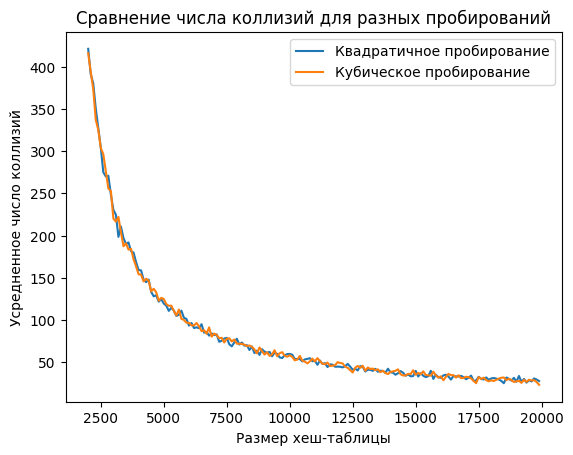

In [7]:
# Строим графики для коллизий
plt.plot(table_sizes, collisions_square, label='Квадратичное пробирование')
plt.plot(table_sizes, collisions_cubic, label='Кубическое пробирование')

plt.xlabel('Размер хеш-таблицы')
plt.ylabel('Усредненное число коллизий')
plt.title('Сравнение числа коллизий для разных пробирований')
plt.legend()
plt.show()

По графику видно, что при больших размерах хеш-таблицы наблюдается маленькое число коллизий.

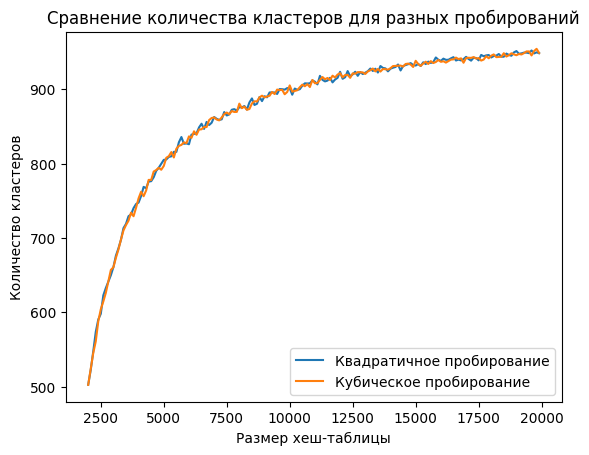

In [9]:
# Строим графики для кластеров
plt.plot(table_sizes, clusters_square, label='Квадратичное пробирование')
plt.plot(table_sizes, clusters_cubic, label='Кубическое пробирование')

plt.xlabel('Размер хеш-таблицы')
plt.ylabel('Количество кластеров')
plt.title('Сравнение количества кластеров для разных пробирований')
plt.legend()
plt.show()

По графику видно, что при больших размерах хеш-таблицы наблюдается большое количество кластеров, что обеспечивает более быстрый поиск и вставку новых элементов.

Исходя из графиков выше можно сделать вывод, что при разных пробированиях результаты поиска количества коллизий и кластеров почти не отличаются.
Поэтому замена квадратического пробирования на кубическое никаких преимуществ не даёт.
